In [1]:
# 필요한 패키지 불러오기

from PIL import Image
import os, glob, sys, numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
# 데이터 불러오기

img_dir = "./data/train"
categories=["male","female"]
np_classes = len(categories)

image_w = 64
image_h = 64
pixel = image_w * image_h * 3

X=[]
y=[]

In [3]:
# 데이터 전처리

for idx, male in enumerate(categories):
    img_dir_detail = img_dir + "/" + male
    files = glob.glob(img_dir_detail+"/*.jpg")


    for i, f in enumerate(files):
        try:
            img = Image.open(f)
            img = img.convert("RGB")
            img = img.resize((image_w, image_h))
            data = np.asarray(img)
            #Y는 0 아니면 1이니까 idx값으로 넣는다.
            X.append(data)
            y.append(idx)
            if i % 10 == 0:
                print(male, " : ", f)
        except:
            print(male, str(i)+" 번째에서 에러 ")
X = np.array(X)
Y = np.array(y)

male  :  ./data/train/male/male_ (295).jpg
male  :  ./data/train/male/male_ (115).jpg
male  :  ./data/train/male/male_ (445).jpg
male  :  ./data/train/male/male_ (867).jpg
male  :  ./data/train/male/male_ (507).jpg
male  :  ./data/train/male/male_ (95).jpg
male  :  ./data/train/male/male_ (177).jpg
male  :  ./data/train/male/male_ (667).jpg
male  :  ./data/train/male/male_ (774).jpg
male  :  ./data/train/male/male_ (949).jpg
male  :  ./data/train/male/male_ (636).jpg
male  :  ./data/train/male/male_ (687).jpg
male  :  ./data/train/male/male_ (922).jpg
male  :  ./data/train/male/male_ (946).jpg
male  :  ./data/train/male/male_ (899).jpg
male  :  ./data/train/male/male_ (595).jpg
male  :  ./data/train/male/male_ (192).jpg
male  :  ./data/train/male/male_ (1006).jpg
male  :  ./data/train/male/male_ (829).jpg
male  :  ./data/train/male/male_ (403).jpg
male  :  ./data/train/male/male_ (289).jpg
male  :  ./data/train/male/male_ (224).jpg
male  :  ./data/train/male/male_ (691).jpg
male  :  ./

female  :  ./data/train/female/female_ (583).jpg
female  :  ./data/train/female/female_ (759).jpg
female  :  ./data/train/female/female_ (387).jpg
female  :  ./data/train/female/female_ (243).jpg
female  :  ./data/train/female/female_ (648).jpg
female  :  ./data/train/female/female_ (420).jpg
female  :  ./data/train/female/female_ (729).jpg
female  :  ./data/train/female/female_ (469).jpg
female  :  ./data/train/female/female_ (304).jpg
female  :  ./data/train/female/female_ (803).jpg
female  :  ./data/train/female/female_ (482).jpg
female  :  ./data/train/female/female_ (284).jpg
female  :  ./data/train/female/female_ (117).jpg
female  :  ./data/train/female/female_ (994).jpg
female  :  ./data/train/female/female_ (293).jpg
female  :  ./data/train/female/female_ (507).jpg
female  :  ./data/train/female/female_ (591).jpg
female  :  ./data/train/female/female_ (601).jpg
female  :  ./data/train/female/female_ (657).jpg
female  :  ./data/train/female/female_ (935).jpg
female  :  ./data/tr

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

xy = (X_train, X_test, Y_train, Y_test)
np.save("./numpy_data/binary_image_data.npy", xy)

In [5]:
# 신경망 설계하기 & 훈련하기

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K

X_train, X_test, y_train, y_test = np.load('./numpy_data/binary_image_data.npy')
print(X_train.shape)
print(X_train.shape[0])
print(np.bincount(y_train))
print(np.bincount(y_test))

(1831, 64, 64, 3)
1831
[888 943]
[ 97 107]


In [6]:
image_w = 64
image_h = 64
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255


with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation="sigmoid"))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model_dir = './model'
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
        
    model_path = model_dir + "/male_female_classify.model"
    checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=7)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
# 모델 자세히 보기
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
__________

In [8]:
# 검증하기
history = model.fit(X_train, y_train, batch_size=128, epochs=300, validation_split=0.15, callbacks=[checkpoint, early_stopping])

Instructions for updating:
Use tf.cast instead.
Train on 1556 samples, validate on 275 samples
Epoch 1/300
1556/1556 [==============================] - 6s 4ms/step - loss: 0.6755 - acc: 0.5784 - val_loss: 0.6182 - val_acc: 0.7055

Epoch 00001: val_loss improved from inf to 0.61824, saving model to ./model/male_female_classify.model
Epoch 2/300
1556/1556 [==============================] - 5s 4ms/step - loss: 0.5975 - acc: 0.6902 - val_loss: 0.5575 - val_acc: 0.7127

Epoch 00002: val_loss improved from 0.61824 to 0.55748, saving model to ./model/male_female_classify.model
Epoch 3/300
1556/1556 [==============================] - 5s 3ms/step - loss: 0.5639 - acc: 0.7153 - val_loss: 0.5270 - val_acc: 0.7273

Epoch 00003: val_loss improved from 0.55748 to 0.52701, saving model to ./model/male_female_classify.model
Epoch 4/300
1556/1556 [==============================] - 5s 3ms/step - loss: 0.5230 - acc: 0.7429 - val_loss: 0.4939 - val_acc: 0.7636

Epoch 00004: val_loss improved from 0.52701 

In [9]:
print("정확도 : %.4f " %(model.evaluate(X_test, y_test)[1]))

204/204 [==============================] - 0s 766us/step
정확도 : 0.9559 


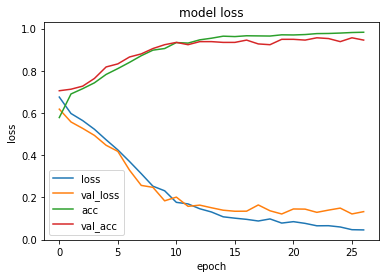

In [10]:
# 결과보기

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss', 'acc', 'val_acc'], loc='lower left')
plt.show()

In [11]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model


caltech_dir = './data/test'


image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)

    filenames.append(f)
    X.append(data)


X = np.array(X)
X = X.astype(float) / 255
model = load_model('./model/male_female_classify.model')

cnt = 0
for i in prediction:
    if i >= 0.5:
        print("해당 " + filenames[cnt].split("\\")[0] + "  이미지는 여자로 추정됩니다.")
    else:
        print("해당 " + filenames[cnt].split("\\")[0] + "  이미지는 남자로 추정됩니다.")
    cnt += 1
    


해당 ./data/test/female_ (348).jpg  이미지는 여자로 추정됩니다.
해당 ./data/test/male_ (38).jpg  이미지는 남자로 추정됩니다.
해당 ./data/test/male_ (843).jpg  이미지는 남자로 추정됩니다.
해당 ./data/test/female_ (674).jpg  이미지는 여자로 추정됩니다.
해당 ./data/test/male_ (373).jpg  이미지는 남자로 추정됩니다.
해당 ./data/test/female_ (421).jpg  이미지는 여자로 추정됩니다.
해당 ./data/test/male_ (201).jpg  이미지는 남자로 추정됩니다.
해당 ./data/test/male_ (178).jpg  이미지는 남자로 추정됩니다.
해당 ./data/test/male_ (37).jpg  이미지는 남자로 추정됩니다.
해당 ./data/test/female_ (82).jpg  이미지는 여자로 추정됩니다.
해당 ./data/test/male_ (132).jpg  이미지는 남자로 추정됩니다.
해당 ./data/test/male_ (282).jpg  이미지는 남자로 추정됩니다.
해당 ./data/test/female_ (627).jpg  이미지는 여자로 추정됩니다.
해당 ./data/test/female_ (164).jpg  이미지는 여자로 추정됩니다.
해당 ./data/test/male_ (264).jpg  이미지는 남자로 추정됩니다.
해당 ./data/test/female_ (559).jpg  이미지는 여자로 추정됩니다.
해당 ./data/test/male_ (232).jpg  이미지는 여자로 추정됩니다.
해당 ./data/test/male_ (338).jpg  이미지는 남자로 추정됩니다.
해당 ./data/test/female_ (958).jpg  이미지는 여자로 추정됩니다.
해당 ./data/test/female_ (414).jpg  이미지는 여자로 추정됩니다.
해당 ./data/test/female_ (1